焦距 f = 35mm   最高分辨率：4256×2832     传感器尺寸：36.0×23.9 mm
根据以上定义可以有：
u0= 4256/2 = 2128   v0= 2832/2 = 1416  dx = 36.0/4256   dy = 23.9/2832
fx = f/dx = 4137.8   fy = f/dy = 4147.3
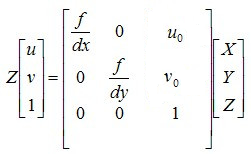

In [16]:
import numpy as np
f = 35
resolution_ratio = [4256,2832]
size = [36.0,23.9]
X = -182.40225563909772
Y = -118.1834745762712
Z = 420
u = 2254.3539407407407
v = 1435.2107949790795
# # def camera_to_pixel(f = 35,resolution_ratio = [4256,2832],size = [36.0,23.9],X = 12.8254,Y = 1.9455,Z = 420):
# #     u0 = resolution_ratio[0]/2
# #     v0 = resolution_ratio[1]/2
# #     dx = size[0]/resolution_ratio[0]
# #     dy = size[1]/resolution_ratio[1]
# #     fx = f/dx
# #     fy = f/dy
# #     K = np.array([[fx,0,u0],[0,fy,v0],[0,0,1]])
# #     camera = np.array([[X],[Y],[Z]])
# #     pixel = np.dot(K,camera)/Z
# #     pixel = pixel.T
# #     u,v = pixel[0][0],pixel[0][1]
# #     return u,v
# u,v = camera_to_pixel()
# print(u,v)

def pixel_to_camera(f = 35,resolution_ratio = [4256,2832],size = [36.0,23.9],Z = 420,u = 331,v = 249):
    u0 = resolution_ratio[0]/2
    v0 = resolution_ratio[1]/2
    dx = size[0]/resolution_ratio[0]
    dy = size[1]/resolution_ratio[1]
    fx = f/dx
    fy = f/dy
    X = (u-u0)*Z/fx
    Y = (v-v0)*Z/fy
    return X,Y,Z
X,Y,Z = pixel_to_camera()
print(X,Y,Z)

-182.40225563909772 -118.1834745762712 420


In [ ]:
2254.3539407407407 1435.2107949790795

# 经相机标定获得相机内参，相机坐标与像素坐标变换

fx = 657.3844
fy = 658.0580
u0 = 303.6258
v0 = 244.8434

X = 331
Y = -118.1834745762712
Z = 420
u = 331
v = 249

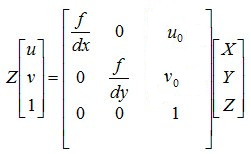

In [20]:
import numpy as np

def camera_to_pixel(fx,fy,u0,v0,X,Y,Z):
    K = np.array([[fx,0,u0],[0,fy,v0],[0,0,1]])
    camera = np.array([[X],[Y],[Z]])
    pixel = np.dot(K,camera)/Z
    pixel = pixel.T
    u,v = pixel[0][0],pixel[0][1]
    return u,v
u,v = camera_to_pixel(657.3844,658.0580,303.6258,244.8434,17.4893,2.6529,420)
print(u,v)

def pixel_to_camera(fx,fy,u0,v0,u,v,Z):
    X = (u-u0)*Z/fx
    Y = (v-v0)*Z/fy
    return X,Y,Z
X,Y,Z = pixel_to_camera(657.3844,658.0580,303.6258,244.8434,331,249,420)
print(X,Y,Z)

331.00006901647623 248.99997635285715
17.489255905677087 2.652915092590621 420


# 相机坐标转世界坐标
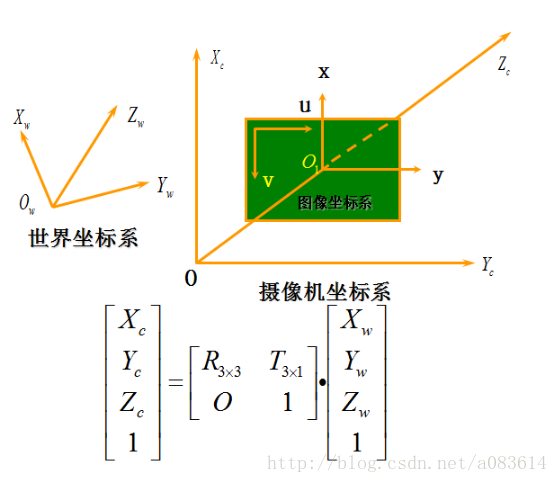


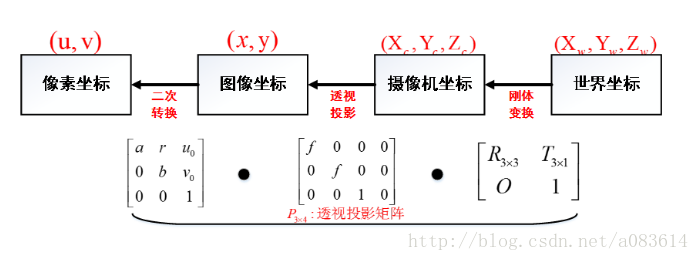

In [32]:
import numpy as np
import math

def angle_to_arc(angle):
    import math
    pi = math.pi
    arc = angle/180*pi
    return arc

def world_to_camera(theta_x,theta_y,theta_z,T,Ow):
    #将世界坐标转换为相机坐标
    Rx = np.array([[1,0,0],
                   [0,math.cos(angle_to_arc(theta_x)),math.sin(angle_to_arc(theta_x))],
                   [0,-math.sin(angle_to_arc(theta_x)),math.cos(angle_to_arc(theta_x))]])
    Ry = np.array([[math.cos(angle_to_arc(theta_x)),0,-math.sin(angle_to_arc(theta_x))],
                   [0,1,0],
                   [math.sin(angle_to_arc(theta_x)),0,math.cos(angle_to_arc(theta_x))]])
    Rz = np.array([[math.cos(angle_to_arc(theta_x)),math.sin(angle_to_arc(theta_x)),0],
                   [-math.sin(angle_to_arc(theta_x)),math.cos(angle_to_arc(theta_x)),0],
                   [0,0,1]])
    R= np.dot(np.dot(Rx,Ry),Rz)
    Oc = np.dot(R,Ow) + T
    return Oc

def camera_to_world(theta_x,theta_y,theta_z,T,Oc):
    #将世界坐标转换为相机坐标
    Rx = np.array([[1,0,0],
                   [0,math.cos(angle_to_arc(theta_x)),math.sin(angle_to_arc(theta_x))],
                   [0,-math.sin(angle_to_arc(theta_x)),math.cos(angle_to_arc(theta_x))]])
    Ry = np.array([[math.cos(angle_to_arc(theta_x)),0,-math.sin(angle_to_arc(theta_x))],
                   [0,1,0],
                   [math.sin(angle_to_arc(theta_x)),0,math.cos(angle_to_arc(theta_x))]])
    Rz = np.array([[math.cos(angle_to_arc(theta_x)),math.sin(angle_to_arc(theta_x)),0],
                   [-math.sin(angle_to_arc(theta_x)),math.cos(angle_to_arc(theta_x)),0],
                   [0,0,1]])
    R= np.dot(np.dot(Rx,Ry),Rz)
    R_N = np.linalg.inv(R)
    Ow = np.dot(R_N,(Oc - T))
    return Ow
    
theta_x = 90
theta_y = 0
theta_z = 0
T = np.array([[100],[200],[300]])
Ow = np.array([[100],[100],[300]])
Oc = world_to_camera(theta_x,theta_y,theta_z,T,Ow)
print(Oc.T[0])
Ow = camera_to_world(theta_x,theta_y,theta_z,T,Oc)
print(Ow.T[0])


[-200.  300.  400.]
[ 100.  100.  300.]
